In [ ]:
# Data Loading & Exploration

In [6]:
import pandas as pd

data = pd.read_csv ('owid-covid-data.csv')

data.columns



Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [7]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [8]:
data.isnull().sum().sort_values(ascending=False)

weekly_icu_admissions_per_million          160893
weekly_icu_admissions                      160893
excess_mortality_cumulative_per_million    160630
excess_mortality                           160630
excess_mortality_cumulative                160630
                                            ...  
total_cases                                  3033
population                                   1075
date                                            0
location                                        0
iso_code                                        0
Length: 67, dtype: int64

In [9]:
data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166326 entries, 0 to 166325
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    166326 non-null  object 
 1   continent                                   156370 non-null  object 
 2   location                                    166326 non-null  object 
 3   date                                        166326 non-null  object 
 4   total_cases                                 163293 non-null  float64
 5   new_cases                                   163133 non-null  float64
 6   new_cases_smoothed                          161150 non-null  float64
 7   total_deaths                                145451 non-null  float64
 8   new_deaths                                  145487 non-null  float64
 9   new_deaths_smoothed                         143390 non-null  float64
 

In [ ]:
 # Data Cleaning

In [12]:
countries = ['Kenya', 'Rwanda', 'Uganda', 'South Africa', 'Nigeria', 'United States', 'India']
covid_df = data[data['location'].isin(countries)]



In [13]:
columns_to_keep = [
    'iso_code', 'continent', 'location', 'date',
    'total_cases', 'new_cases',
    'total_deaths', 'new_deaths',
    'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
    'population'
]

# Create a new DataFrame with only those
covid_df = data[columns_to_keep]


In [20]:
covid_df.loc[:, 'date'] = pd.to_datetime(covid_df['date'])



In [16]:
covid_df.isnull().sum().sort_values(ascending=False)


people_fully_vaccinated    126085
people_vaccinated          123339
total_vaccinations         121132
total_deaths                20875
new_deaths                  20839
continent                    9956
new_cases                    3193
total_cases                  3033
population                   1075
iso_code                        0
location                        0
date                            0
dtype: int64

In [18]:
# Drop rows with missing key values
covid_df = covid_df.dropna(subset=['date', 'total_cases', 'total_deaths'])

# Sort and forward-fill missing values per country
covid_df = covid_df.sort_values(['location', 'date'])
covid_df = covid_df.fillna(method='ffill')


In [ ]:
# Exploratory Data Analysis (EDA)

In [19]:
covid_df.describe()


,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,population
count,145450,1.454500e+05,1.454500e+05,1.454500e+05,145450.000000,1.451140e+05,1.451140e+05,1.450360e+05,1.454500e+05
mean,2021-03-23 02:05:56.510140928,2.847143e+06,1.298287e+04,5.766447e+04,171.235923,1.580603e+08,7.631559e+07,6.721368e+07,1.663375e+08
min,2020-01-22 00:00:00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,4.981000e+03
25%,2020-09-29 00:00:00,5.342250e+03,6.250000e+00,7.900000e+01,0.000000,3.917810e+05,2.575260e+05,2.268058e+05,2.397240e+06
50%,2021-03-29 00:00:00,4.647400e+04,1.450000e+02,7.830000e+02,2.000000,2.613518e+06,1.556134e+06,1.229358e+06,1.016792e+07
75%,2021-09-17 00:00:00,3.822640e+05,1.394000e+03,7.307000e+03,20.000000,1.762255e+07,9.300879e+06,8.091251e+06,3.806791e+07
max,2022-03-05 00:00:00,4.451295e+08,4.206334e+06,5.995245e+06,18020.000000,1.085079e+10,4.976031e+09,4.400787e+09,7.874966e+09
std,NaN,1.632664e+07,8.930914e+04,3.021155e+05,832.370948,8.617947e+08,4.062349e+08,3.650945e+08,7.487753e+08


In [21]:
# key column stats
covid_df[['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']].describe()



,total_cases,total_deaths,new_cases,new_deaths,total_vaccinations
count,1.454500e+05,1.454500e+05,1.454500e+05,145450.000000,1.451140e+05
mean,2.847143e+06,5.766447e+04,1.298287e+04,171.235923,1.580603e+08
std,1.632664e+07,3.021155e+05,8.930914e+04,832.370948,8.617947e+08
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,5.342250e+03,7.900000e+01,6.250000e+00,0.000000,3.917810e+05
50%,4.647400e+04,7.830000e+02,1.450000e+02,2.000000,2.613518e+06
75%,3.822640e+05,7.307000e+03,1.394000e+03,20.000000,1.762255e+07
max,4.451295e+08,5.995245e+06,4.206334e+06,18020.000000,1.085079e+10


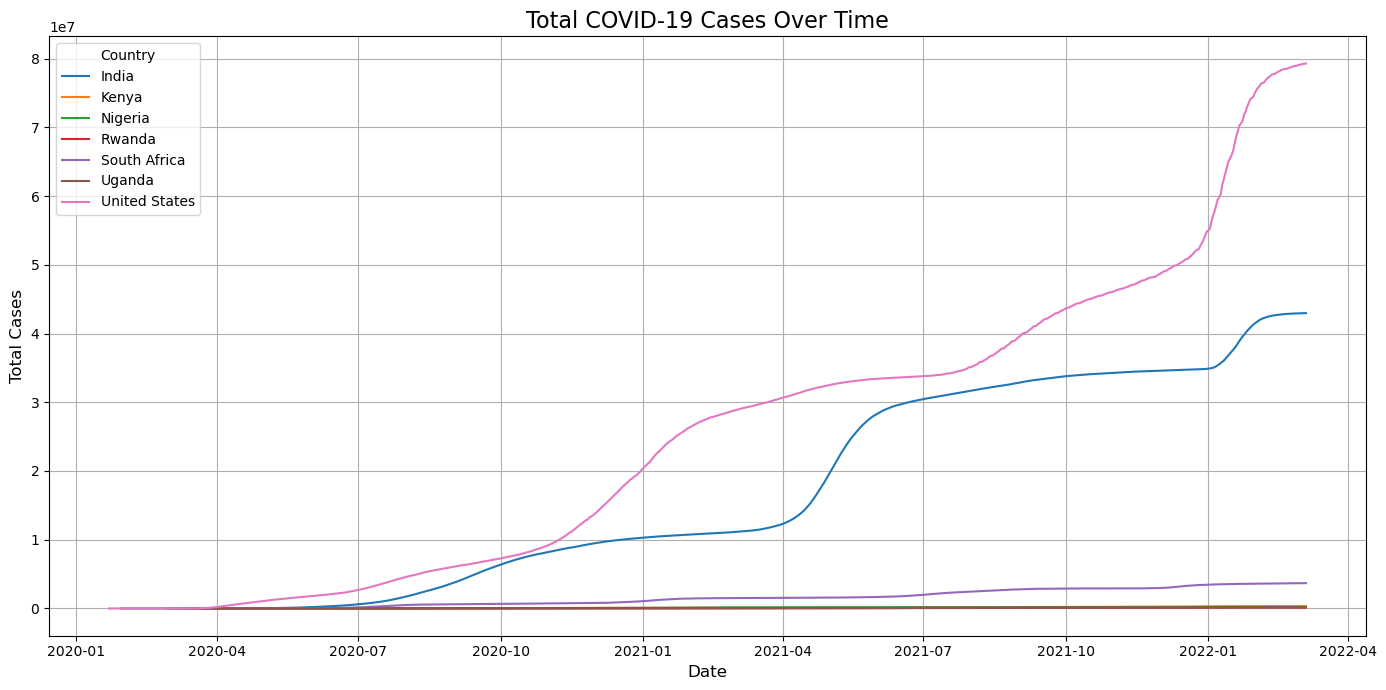

In [24]:
# cases over time

# Step 1: Define countries of interest
countries = ['Kenya', 'Rwanda', 'Uganda', 'South Africa', 'Nigeria', 'United States', 'India']

# Step 2: Filter the original data
covid_df = data[data['location'].isin(countries)].copy()  # Use .copy() to avoid warnings

# Step 3: Convert date column to datetime
covid_df['date'] = pd.to_datetime(covid_df['date'])


import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(14, 7))

# Plot total cases for each country
for country in covid_df['location'].unique():
    country_data = covid_df[covid_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

# Add titles and labels
plt.title('Total COVID-19 Cases Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Cases', fontsize=12)
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


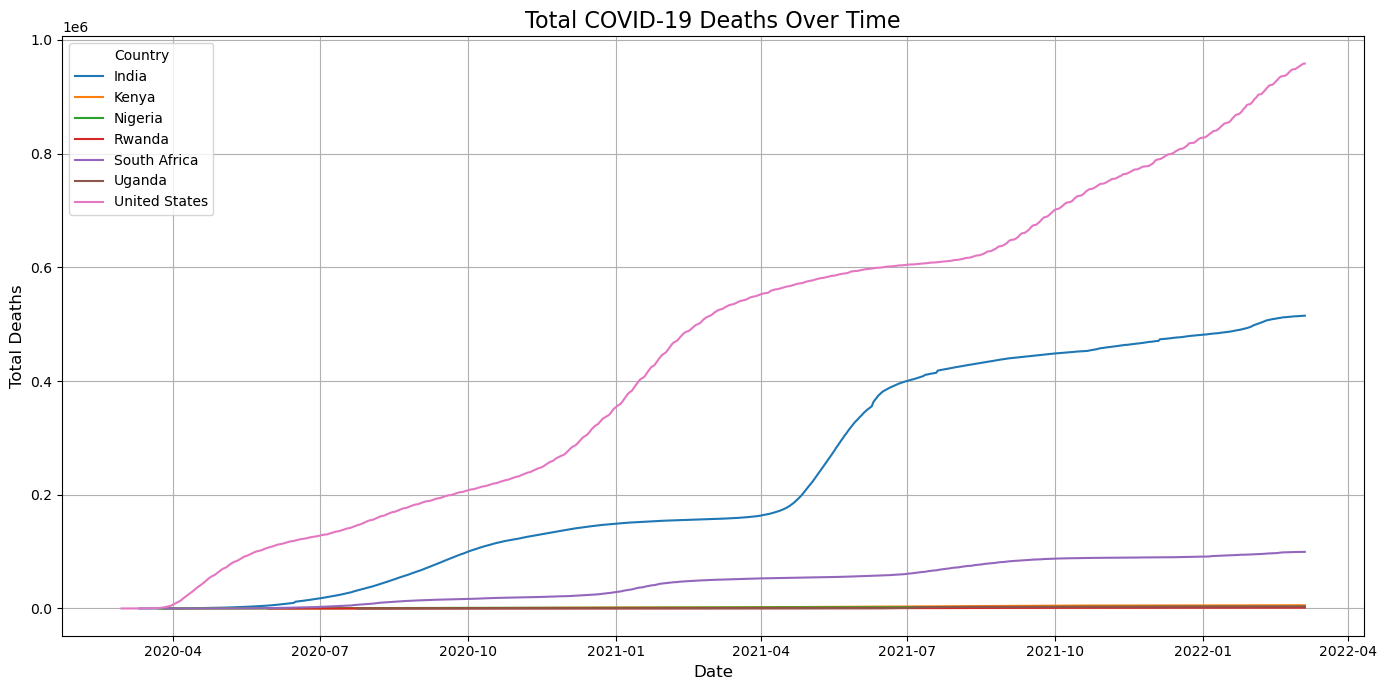

In [25]:
# deaths over time

import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(14, 7))

# Plot total deaths for each selected country
for country in covid_df['location'].unique():
    country_data = covid_df[covid_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

# Add chart elements
plt.title('Total COVID-19 Deaths Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


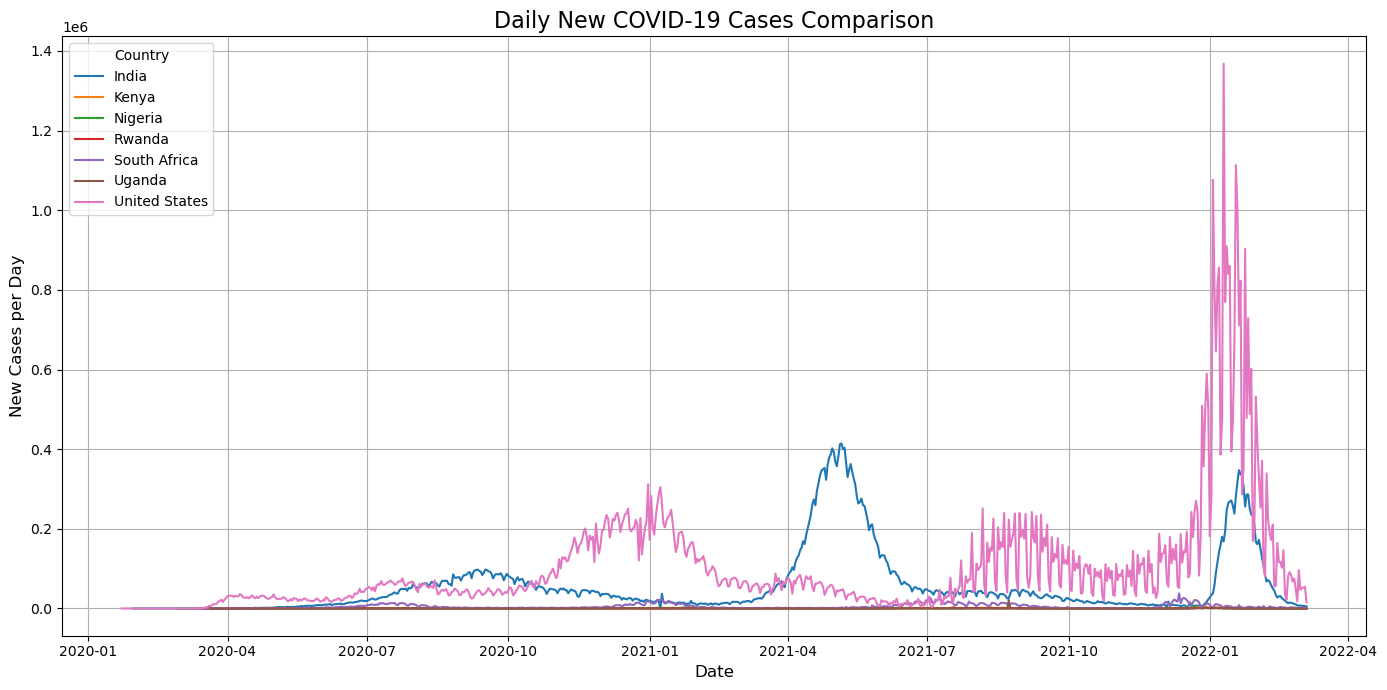

In [26]:
# Daily new cases between countries

import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(14, 7))

# Plot new daily cases for each country
for country in covid_df['location'].unique():
    country_data = covid_df[covid_df['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

# Add chart elements
plt.title('Daily New COVID-19 Cases Comparison', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('New Cases per Day', fontsize=12)
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


In [31]:
# computed death rate for each year for an overview
covid_df['year'] = covid_df['date'].dt.year
annual_summary = covid_df.groupby(['location', 'year'])[['total_cases', 'total_deaths']].max().reset_index()
annual_summary['death_rate'] = annual_summary['total_deaths'] / annual_summary['total_cases']
display(annual_summary)



,location,year,total_cases,total_deaths,death_rate
0,India,2020,10286709.0,148994.0,0.014484
1,India,2021,34861579.0,481486.0,0.013811
2,India,2022,42962953.0,515036.0,0.011988
3,Kenya,2020,96458.0,1670.0,0.017313
4,Kenya,2021,295028.0,5378.0,0.018229
5,Kenya,2022,323071.0,5640.0,0.017457
6,Nigeria,2020,87607.0,1289.0,0.014713
7,Nigeria,2021,241513.0,3030.0,0.012546
8,Nigeria,2022,254637.0,3142.0,0.012339
9,Rwanda,2020,8383.0,92.0,0.010975


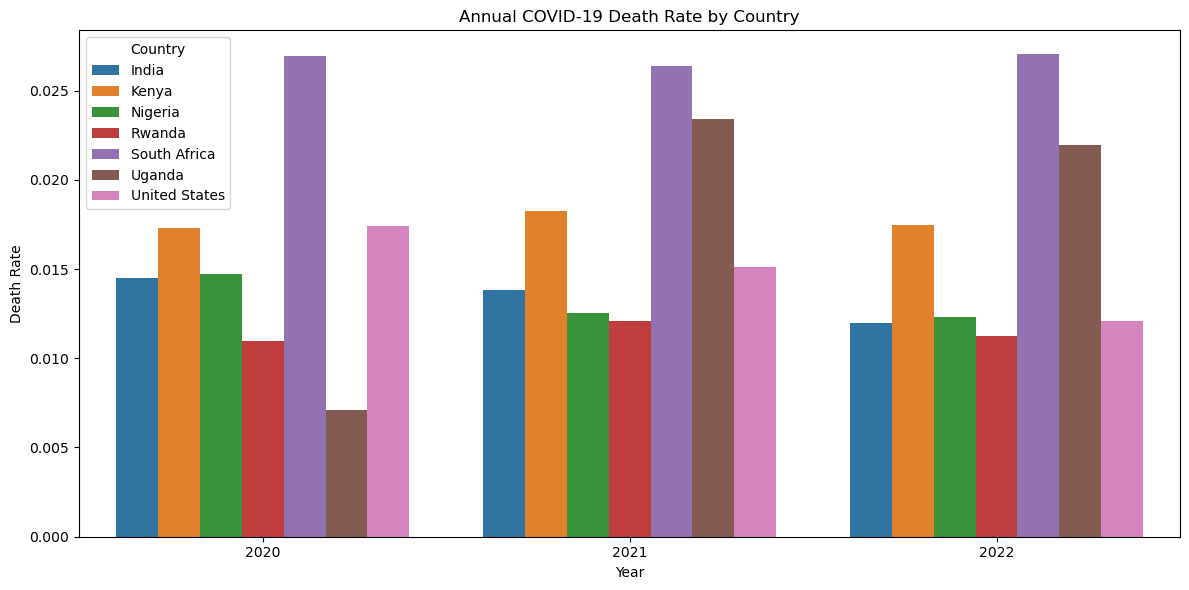

In [30]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(data=annual_summary, x='year', y='death_rate', hue='location')
plt.title('Annual COVID-19 Death Rate by Country')
plt.ylabel('Death Rate')
plt.xlabel('Year')
plt.legend(title='Country')
plt.tight_layout()
plt.show()


location
United States    79265726.0
India            42962953.0
South Africa      3683172.0
Kenya              323071.0
Nigeria            254637.0
Uganda             163383.0
Rwanda             129551.0
Name: total_cases, dtype: float64


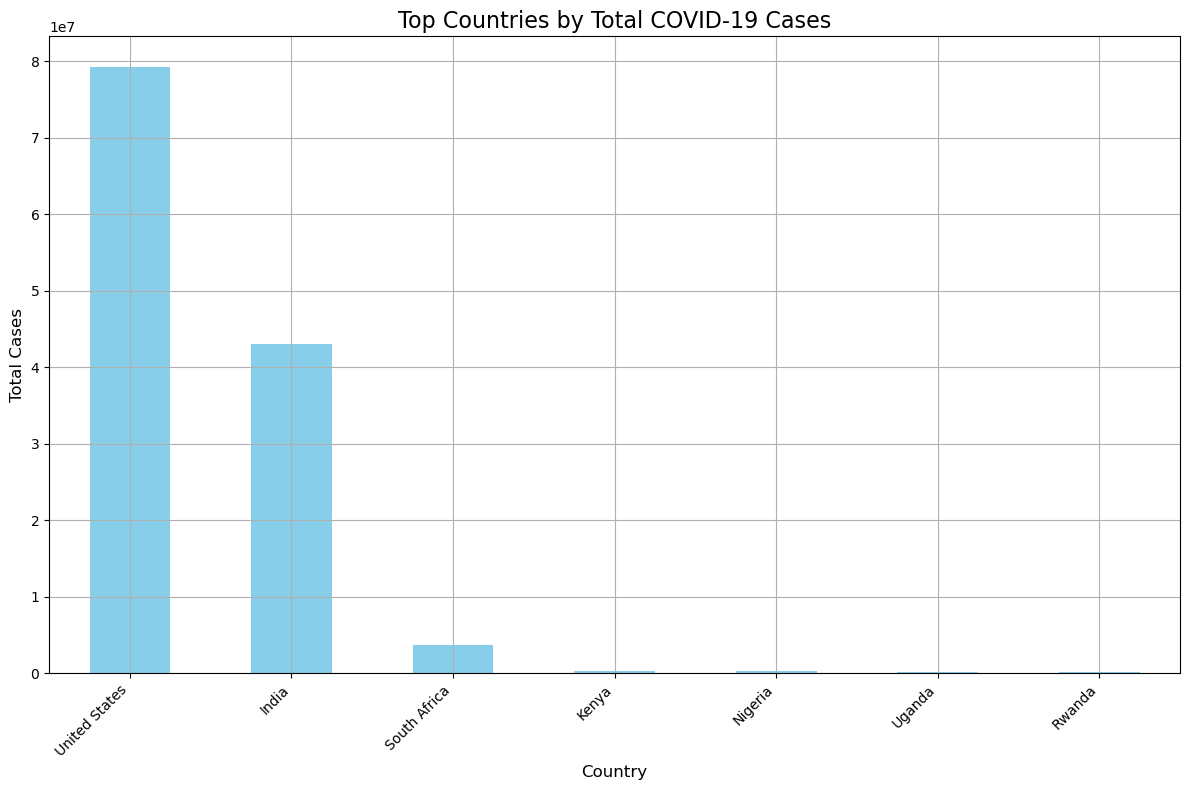

In [32]:
# Bar charts (top countries by total cases).
# Group by location (country) and sum total cases
top_countries_cases = covid_df.groupby('location')['total_cases'].max().sort_values(ascending=False)

# Display the top countries by total cases
print(top_countries_cases.head(20))


import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 8))

# Plot the bar chart for the top countries
top_countries_cases.head(10).plot(kind='bar', color='skyblue')

# Add chart elements
plt.title('Top Countries by Total COVID-19 Cases', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Cases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()





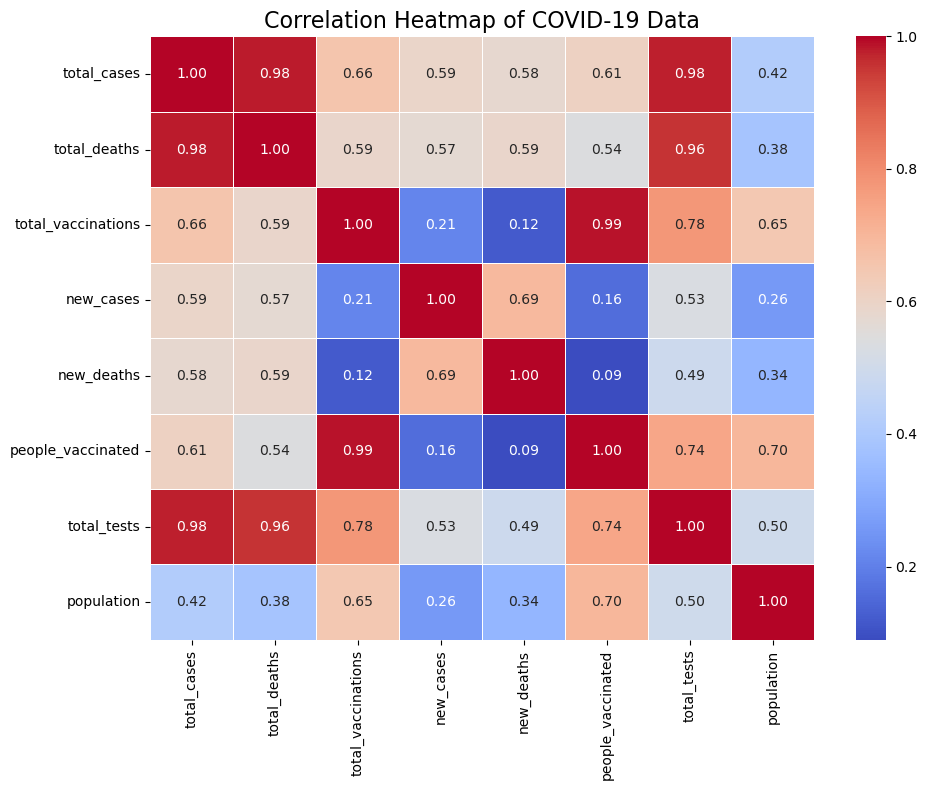

In [33]:


# Heatmaps (optional for correlation analysis).
# Selecting relevant columns for correlation analysis
correlation_columns = ['total_cases', 'total_deaths', 'total_vaccinations', 'new_cases', 'new_deaths', 'people_vaccinated', 'total_tests', 'population']
correlation_df = covid_df[correlation_columns]
# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and labels
plt.title('Correlation Heatmap of COVID-19 Data', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()


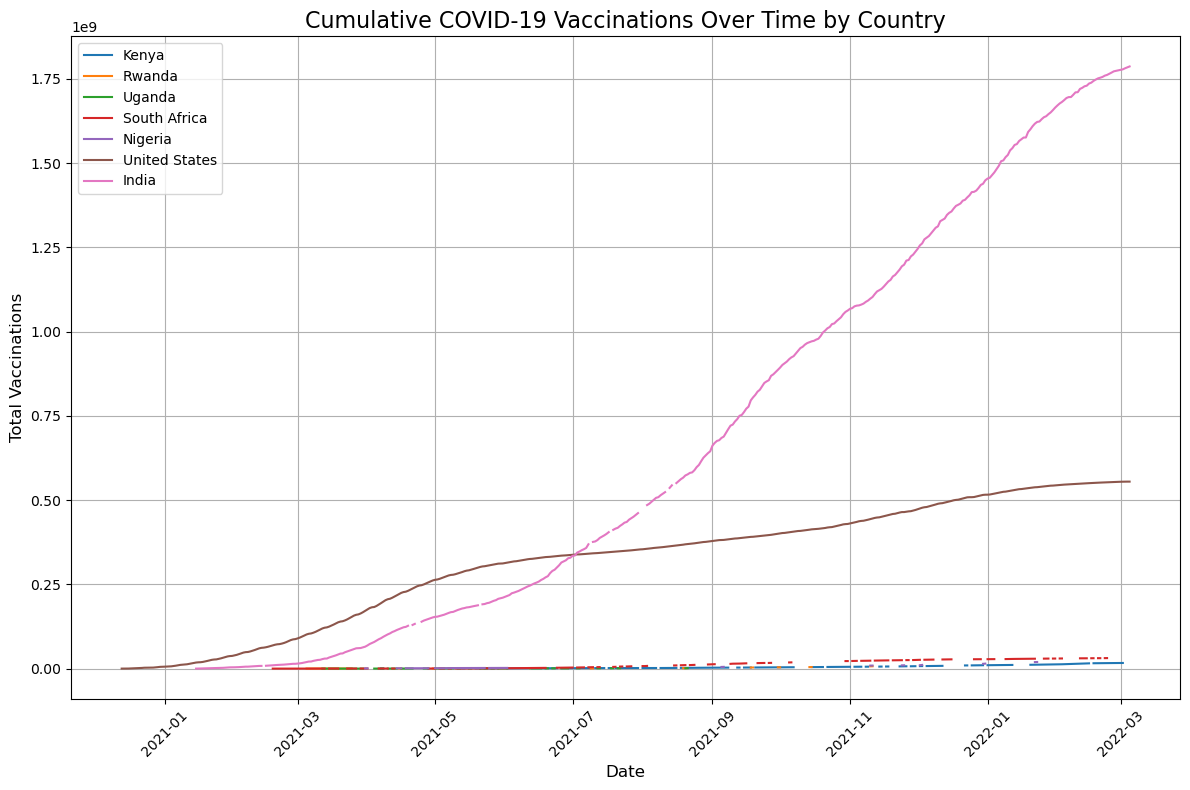

In [34]:
#vaccination over time

selected_countries = ['Kenya', 'Rwanda', 'Uganda', 'South Africa', 'Nigeria', 'United States', 'India']
covid_df = covid_df[covid_df['location'].isin(selected_countries)]

covid_df['date'] = pd.to_datetime(covid_df['date'])


import matplotlib.pyplot as plt

# Set the figure size for the plot
plt.figure(figsize=(12, 8))

# Plot cumulative vaccinations for each country over time
for country in selected_countries:
    country_data = covid_df[covid_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

# Add title and labels
plt.title('Cumulative COVID-19 Vaccinations Over Time by Country', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Vaccinations', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show legend for country labels
plt.legend()

# Grid for better readability
plt.grid(True)

# Tight layout to adjust spacing
plt.tight_layout()

# Show the plot
plt.show()



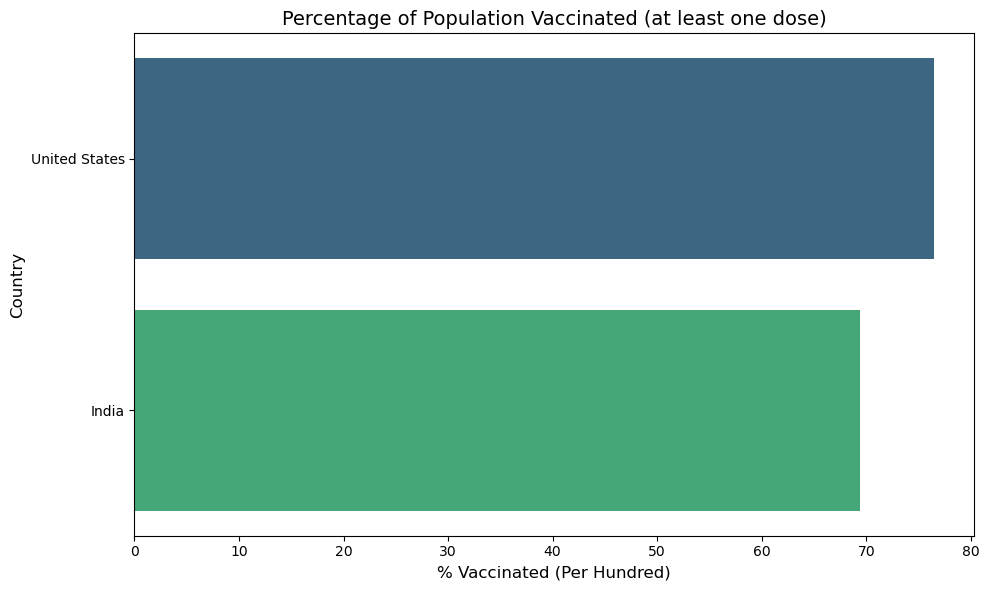

In [35]:
# compare % vaccinated

# Get the latest date available in the dataset
latest_date = covid_df['date'].max()

# Filter data for the latest date
latest_data = covid_df[covid_df['date'] == latest_date]

# Filter for the selected countries
latest_data = latest_data[latest_data['location'].isin(selected_countries)]

# Select relevant columns
vaccinated_df = latest_data[['location', 'people_vaccinated_per_hundred']].dropna()


import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Sort by vaccination percentage for better visuals
vaccinated_df = vaccinated_df.sort_values('people_vaccinated_per_hundred', ascending=False)

# Create bar plot
sns.barplot(data=vaccinated_df, x='people_vaccinated_per_hundred', y='location', palette='viridis')

# Add chart labels
plt.title('Percentage of Population Vaccinated (at least one dose)', fontsize=14)
plt.xlabel('% Vaccinated (Per Hundred)', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Display the chart
plt.tight_layout()
plt.show()




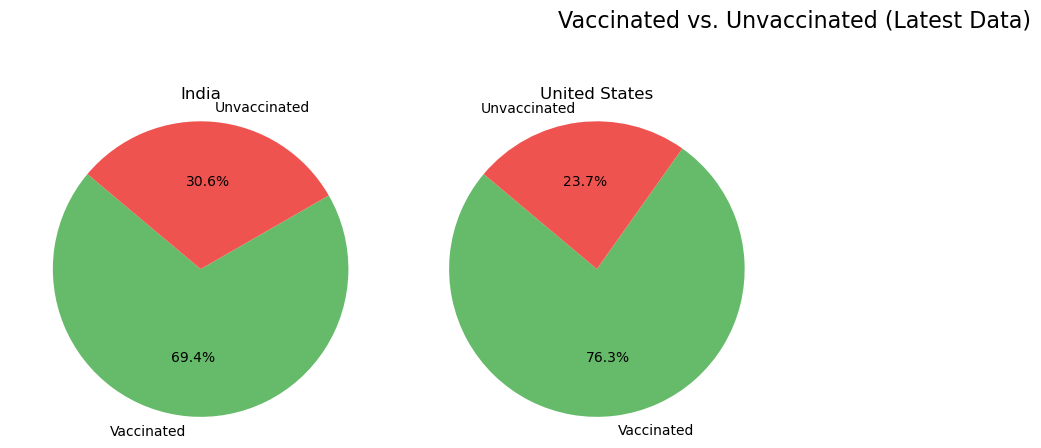

In [36]:
# vaccinated v not-vaccinated

# Get latest date
latest_date = covid_df['date'].max()

# Filter for that date and selected countries
latest_data = covid_df[(covid_df['date'] == latest_date) & (covid_df['location'].isin(selected_countries))]

# Drop countries with missing vaccination or population data
latest_data = latest_data.dropna(subset=['people_vaccinated', 'population'])
import matplotlib.pyplot as plt

# Set up subplots: one pie per country
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()  # flatten to 1D array for easy iteration

for i, country in enumerate(latest_data['location']):
    row = latest_data[latest_data['location'] == country].iloc[0]
    vaccinated = row['people_vaccinated']
    unvaccinated = row['population'] - vaccinated
    
    # Pie chart data
    sizes = [vaccinated, unvaccinated]
    labels = ['Vaccinated', 'Unvaccinated']
    colors = ['#66bb6a', '#ef5350']

    # Create pie chart
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    axes[i].axis('equal')  # Equal aspect ratio ensures circle shape
    axes[i].set_title(country)

# Remove any unused subplots (e.g., if fewer than 8 countries)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Overall title
plt.suptitle('Vaccinated vs. Unvaccinated (Latest Data)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()





In [37]:
# table on vaccinated/unvaccinated

3no data on vaccinations for other countries

# Prepare table data
vacc_table = latest_data[['location', 'people_vaccinated', 'population']].copy()

# Calculate unvaccinated
vacc_table['unvaccinated'] = vacc_table['population'] - vacc_table['people_vaccinated']

# Calculate % vaccinated (optional)
vacc_table['% vaccinated'] = (vacc_table['people_vaccinated'] / vacc_table['population']) * 100

# Round numbers for clarity
vacc_table[['people_vaccinated', 'unvaccinated', '% vaccinated']] = vacc_table[['people_vaccinated', 'unvaccinated', '% vaccinated']].round(0)

# Reorder columns
vacc_table = vacc_table[['location', 'people_vaccinated', 'unvaccinated', 'population', '% vaccinated']]

# Display the table
print(vacc_table.to_string(index=False))


     location  people_vaccinated  unvaccinated   population  % vaccinated
        India        967153861.0   426255172.0 1393409033.0          69.0
United States        254002347.0    78912727.0  332915074.0          76.0


## 📊 Insights & Reporting

- **USA and India** had the highest number of infections and deaths in absolute terms.  
  However, their **death rates were comparable** to other countries. Notably, **South Africa** and **Uganda** recorded the **highest death rates** in 2021 and 2022.

- **Vaccination data** is primarily available for the USA and India. This may reflect better **access to vaccines**, whereas many African countries had limited or delayed access.  
  Critically, the countries with the highest death rates **should have been prioritized** in global vaccine distribution efforts.

- By **March 2022**, approximately **70% of the population** in India and the USA had received at least one dose of the COVID-19 vaccine.  
  In contrast, the percentage for most African countries was **negligible**. This highlights the need for **Africa to invest in local pharmaceutical manufacturing** to ensure equitable access in future health crises.

- The **death rate for the USA and India peaked in 2020** and **declined steadily** in subsequent years.  
  For other countries, death rates either **remained stable or increased**, suggesting unequal access to vaccines, healthcare quality, or differences in public health strategies.  
  These variations should be **studied in detail** to derive lessons for the management of **future



   pandemics**.
